In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Требуется решить задачу Коши для приведённой системы дифференциальных уравнений первого порядка:

$\frac{dx}{dt} = F_{x}(x, y)$, $\frac{dy}{dt} = F_{y}(x, y)$

методом Рунге-Кутты второго либо четвёртого порядка точности. Начальные условия:

$x(t_{0}) = x_{0}$, $y(t_{0}) = y_{0}$

Строить решение нужно до преодоления параметром $t$ точки $t_{0}$.
Относительная точность должна быть не хуже $10^{-5}$

Система уравнений:

$x^\prime = t + 3x - 2y$

$y^\prime = 3x - 4y$

Начальные условия:

$x(t_{0}) = 2$, $y(t_{0}) = 3$

$t_{0} = 0, t_{1} = 2$

In [3]:
def F1(t, x, y):
    return t + 3 * x - 2 * y

def F2(x, y):
    return 3 * x - 4 * y 

Метод Рунге-Кутты четвертого порядка точности: 

In [4]:
def R_G(low, high, h):
    t = []
    xi = []
    yi = []
    xi.append(2)
    yi.append(3)
    t.append(low)
    low += h
    i = 1
    while round(low, 4) <= high:
        # X
        k1_x = h * F1(low, xi[i - 1], yi[i - 1])
        k2_x = h * F1(low + h / 2, xi[i - 1] + k1_x / 2, yi[i - 1] + k1_x / 2)
        k3_x = h * F1(low + h / 2, xi[i - 1] + k2_x / 2, yi[i - 1] + k2_x / 2)
        k4_x = h * F1(low + h, xi[i - 1] + k3_x, yi[i - 1] + k3_x)
        xi.append(xi[i - 1] + (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6)
        # Y
        k1_y = h * F2(xi[i - 1], yi[i - 1])
        k2_y = h * F2(xi[i - 1] + k1_y / 2, yi[i - 1] + k1_y / 2)
        k3_y = h * F2(xi[i - 1] + k2_y / 2, yi[i - 1] + k2_y / 2)
        k4_y = h * F2(xi[i - 1] + k3_y, yi[i - 1] + k3_y)
        yi.append(yi[i - 1] + (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6)
        
        t.append(low)
        low += h
        i += 1
    return t, xi, yi 

In [5]:
array_points = R_G(0, 2, 0.1)

In [6]:
data = pd.DataFrame(index = ['t', 'x', 'y'], 
                   data = [array_points[0], array_points[1], array_points[2]]).T

Полученные точки прирешении системы ДУ:

In [7]:
data

,t,x,y
0,0.0,2.000000,3.000000
1,0.1,2.015688,2.429025
2,0.2,2.166942,2.079870
3,0.3,2.449879,1.906803
4,0.4,2.869005,1.880388
5,0.5,3.436444,1.983683
6,0.6,4.171708,2.209656
7,0.7,5.101941,2.559521
8,0.8,6.262601,3.041780
9,0.9,7.698541,3.671820


Построим график траеторий, порождённой этой последовательностью точек:

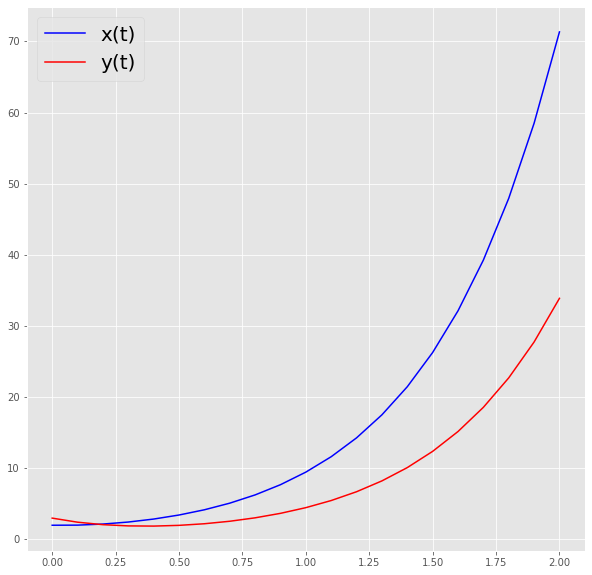

In [8]:
plt.figure(figsize(10, 10))
plt.plot(array_points[0], array_points[1], color = 'b', label = 'x(t)')
plt.plot(array_points[0], array_points[2], color = 'r', label = 'y(t)')
plt.legend(prop={'size': 20})
plt.show()

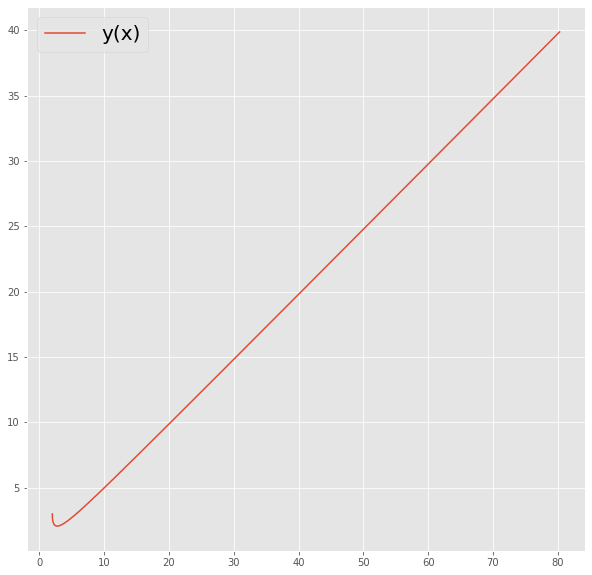

In [19]:
plt.plot(array_points[1], array_points[2], label = 'y(x)')
plt.legend(prop={'size': 20})
plt.show()

Правило Рунге оценки погрешности:

In [9]:
array_exp = R_G(0, 2, 0.05)

exp = []
for i, x in enumerate(array_exp[1]):
    if i % 2 == 0 or i == len(array_exp[1]) - 1:
        exp.append(x)
        
e = []
for i in range(len(exp)):
    e.append( abs(array_points[1][i] - exp[i]) / 3 )

In [10]:
e

[0.0,
 0.008380334049821562,
 0.01488049533178278,
 0.020692112119942152,
 0.026749809635896387,
 0.03385602090908346,
 0.042776486551725945,
 0.054318277565313856,
 0.06939918425756897,
 0.08911539443514489,
 0.11481325050942282,
 0.14817033763651763,
 0.1912910915985281,
 0.24682245463843464,
 0.31809581757003375,
 0.40930256617945204,
 0.5257120251307986,
 0.6739425142432841,
 0.8622986762453569,
 1.1011913051013167,
 1.4036597334771035]

Решим символьно систему и построим решение:

In [11]:
def f_x(t):
    return 41 / (5 * 18) * np.exp(-3 * t) * (6 * np.exp(5 * t) - 1) - (2 * 37) / (5 * 12) * np.exp(-3 * t) * (np.exp( 5 * t) - 1) - 2 * t / 3 - 5 / 18

def f_y(t):
    return (3 * 41) / (5 * 18) * np.exp(-3 * t) * (np.exp(5 * t) - 1) - 37 / (5 * 12) * np.exp(-3 * t) * (np.exp(5 * t) - 6) + 1 / 12 * (-6 * t - 1)

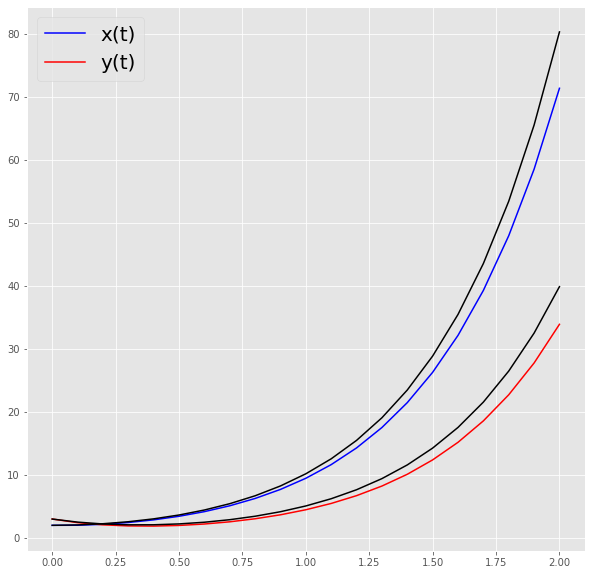

In [12]:
plt.figure(figsize(10, 10))
plt.plot(array_points[0], array_points[1], color = 'b', label = 'x(t)')
plt.plot(array_points[0], array_points[2], color = 'r', label = 'y(t)')

plt.plot(array_points[0], [f_x(i) for i in array_points[0]], color = 'black')
plt.plot(array_points[0], [f_y(i) for i in array_points[0]], color = 'black')

plt.legend(prop={'size': 20})
plt.show()

Увеличим точность с помощью уменьшения шага:

In [13]:
np.log(50000) / np.log(2)

15.609640474436812

In [14]:
40 * 1024

40960

In [15]:
array_points = R_G(0, 2, 2 / 40960)

In [16]:
data = pd.DataFrame(index = ['t', 'x', 'y'], 
                   data = [array_points[0], array_points[1], array_points[2]]).T

Количество точек:

In [17]:
data.shape[0]

40962

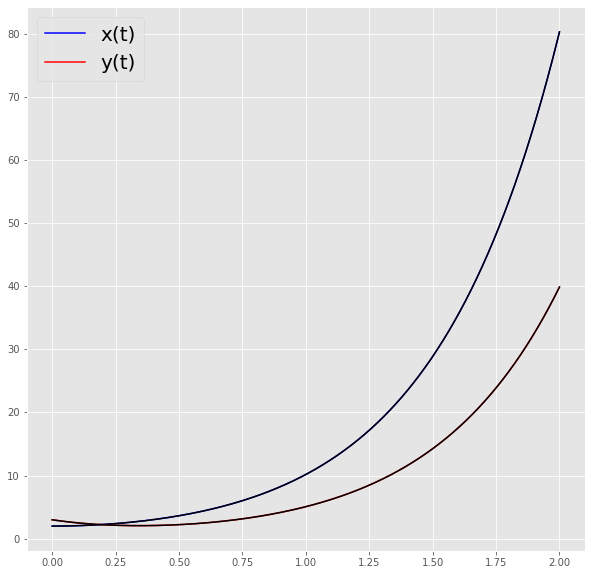

In [18]:
plt.figure(figsize(10, 10))
plt.plot(array_points[0], array_points[1], color = 'b', label = 'x(t)')
plt.plot(array_points[0], array_points[2], color = 'r', label = 'y(t)')

plt.plot(array_points[0], [f_x(i) for i in array_points[0]], color = 'black')
plt.plot(array_points[0], [f_y(i) for i in array_points[0]], color = 'black')

plt.legend(prop={'size': 20})
plt.show()